# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

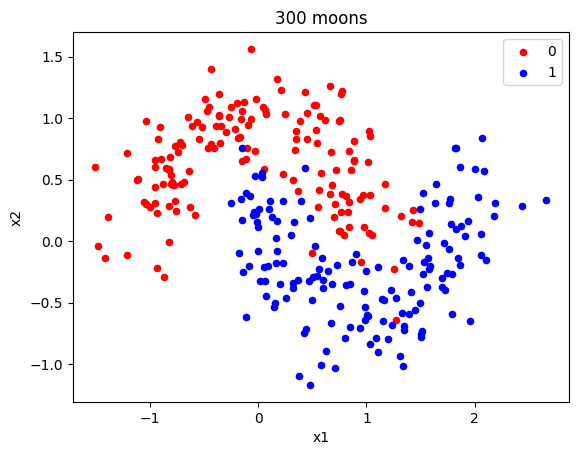

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [3]:
# YOUR CODE HERE

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [4]:
X, y = make_moons(n_samples=250, noise=0.20, random_state=0)

In [5]:
from sklearn.model_selection import train_test_split

# Assuming you have X and y as your original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 2), (75, 2), (175,), (75,))

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import  layers

2023-07-23 15:20:31.279569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
X_train.shape[1]

2

In [9]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = Sequential()
    model.add(layers.Dense(5, activation='relu', input_dim=2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [11]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.7429
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7657
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7829
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8171
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.8229
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.8457
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8400
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.8571
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8629
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.8571
Epoch 11/

11/11 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8743
Epoch 84/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8743
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8743
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8743
Epoch 87/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8743
Epoch 88/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8743
Epoch 89/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.8743
Epoch 90/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.8743
Epoch 91/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.8743
Epoch 92/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8743
Epoch 93/100


👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [12]:
history.__dict__

{'validation_data': None,
 'model': <keras.src.engine.sequential.Sequential at 0x15d067460>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6349687576293945,
   0.6255390048027039,
   0.6168378591537476,
   0.6081352233886719,
   0.5994682312011719,
   0.5912361145019531,
   0.58250492811203,
   0.5743478536605835,
   0.5658972859382629,
   0.5575974583625793,
   0.5494938492774963,
   0.540819525718689,
   0.532817006111145,
   0.5242975950241089,
   0.5160326361656189,
   0.5071502327919006,
   0.4989217221736908,
   0.49034497141838074,
   0.481180340051651,
   0.4722663164138794,
   0.463321328163147,
   0.4547954797744751,
   0.44657522439956665,
   0.4381692111492157,
   0.43056344985961914,
   0.4233812093734741,
   0.41617539525032043,
   0.4090964198112488,
   0.40281957387924194,
   0.39676254987716675,
   0.3910038471221924,
   0.3852933943271637,
   0.3801391124725342,
   0.3750446140766144,
   0.37028852105140686,
   0.3659036159515381,
 

❓ Plot the history of the train loss using the following function ❓

In [13]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

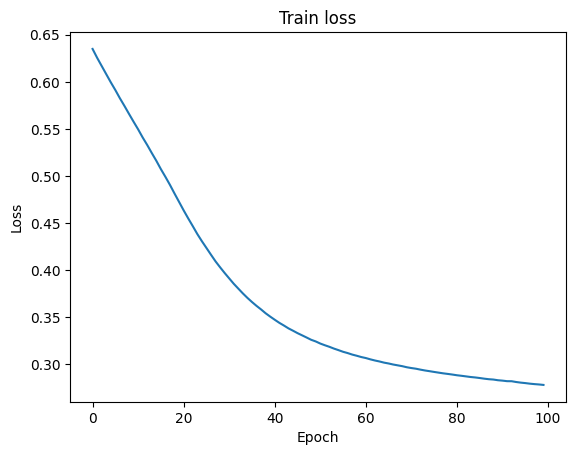

In [14]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [15]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [16]:
res = model.evaluate(X_test, y_test, verbose=0)

loss = res[0]
accuracy = res[1]

In [17]:
print(f'loss = binary crossentropy = {round(loss, 4)}')
print(f'metrics = accuracy = {round(accuracy * 100, 4)} %')

loss = binary crossentropy = 0.2909
metrics = accuracy = 84.0 %


**🧪 Test your code**

In [18]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/renatoboemer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/renatoboemer/code/lewagon/data-your-first-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1940/1940 [==============================] - 2s 864us/step


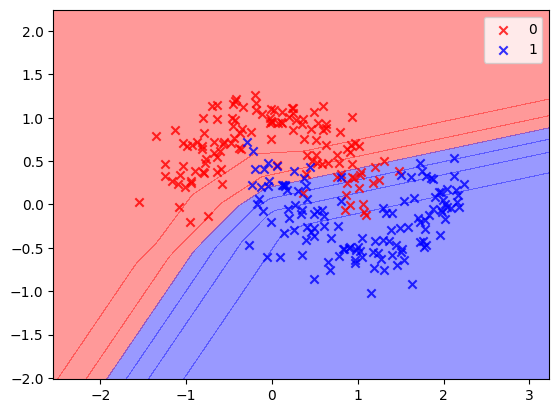

In [19]:
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [22]:
def initialize_model():
    model = Sequential()
    model.add(layers.Dense(5, activation='relu', input_dim=2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [23]:
model = initialize_model()

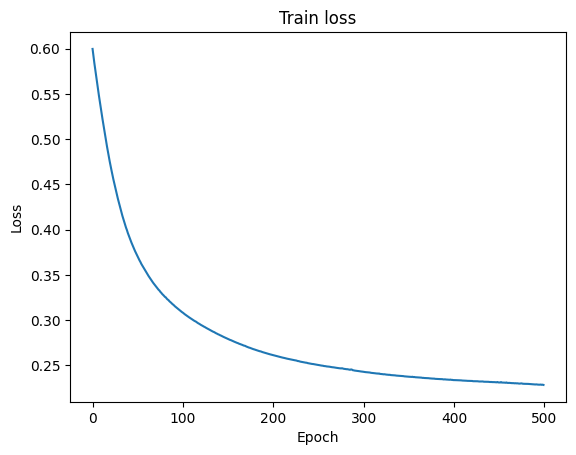

In [24]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=16,
                    verbose=0)

plot_history(history)

❓ Did the test accuracy improve? ❓

In [26]:
results = model.evaluate(X_test, y_test, verbose=0)
print(results[1])

0.8533333539962769


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [27]:
def initialize_model_2():
    model = Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
        
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [29]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=16,
                    verbose=0)

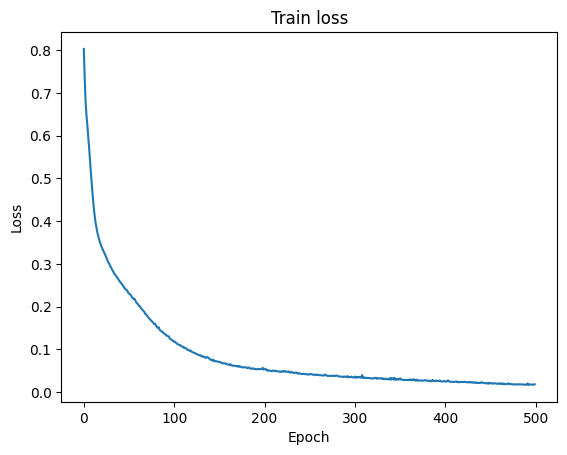

In [30]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [31]:
res = model.evaluate(X_test, y_test, verbose=0)

accuracy_deep = res[1]

In [32]:
accuracy_deep

0.9200000166893005

🧪 **Test your code**

In [33]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/renatoboemer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/renatoboemer/code/lewagon/data-your-first-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1940/1940 [==============================] - 2s 891us/step


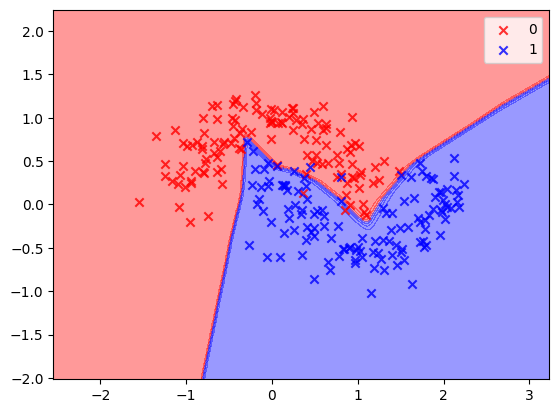

In [34]:
plot_decision_regions(X, y, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!